In [1]:
from arcgis.features import *
import arcgis

In [2]:
lyr_url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/MapServer/38'
crime_layer = FeatureLayer(lyr_url)
all_features = crime_layer.query()
crime = all_features.df
crime.head()

,ANC,BID,BLOCK,BLOCK_GROUP,CCN,CENSUS_TRACT,DISTRICT,END_DATE,LATITUDE,LONGITUDE,...,OFFENSE,PSA,REPORT_DAT,SHIFT,START_DATE,VOTING_PRECINCT,WARD,XBLOCK,YBLOCK,SHAPE
0,2B,None,1400 - 1499 BLOCK OF T STREET NW,004300 2,17215515,004300,3,1.513322e+12,38.915568,-77.033255,...,THEFT F/AUTO,301,1513324167000,DAY,1513290613000,Precinct 141,2,397116,138634,"{'x': 397116, 'y': 138634}"
1,2B,None,1400 - 1499 BLOCK OF 15TH STREET NW,005201 2,17215530,005201,2,1.513324e+12,38.909172,-77.034566,...,THEFT F/AUTO,208,1513327286000,DAY,1513278014000,Precinct 16,2,397002,137924,"{'x': 397002, 'y': 137924}"
2,5E,None,600 - 699 BLOCK OF MONROE STREET NE,009201 1,17215542,009201,5,1.513333e+12,38.932355,-76.997105,...,THEFT F/AUTO,502,1513374948000,EVENING,1513324244000,Precinct 74,5,400251,140497,"{'x': 400251, 'y': 140497}"
3,7D,None,4400 4499 BLOCK OF BENNING ROAD NE,009603 1,17215546,009603,6,NaN,38.891117,-76.938597,...,BURGLARY,608,1513329916000,DAY,1513325326000,Precinct 102,7,405327,135921,"{'x': 405327, 'y': 135921}"
4,4B,None,100 - 199 BLOCK OF CARROLL STREET NW,001702 2,17215575,001702,4,NaN,38.974837,-77.014333,...,THEFT/OTHER,401,1513332640000,DAY,1513330670000,Precinct 63,4,398758,145213,"{'x': 398758, 'y': 145213}"


### Total crime incidents in 2017

In [3]:
print(crime.shape[0])

33068


### Crime per capita in DC

In [4]:
dc_2017_population = 693972 #source-us census
print('Crimes per 100 people in DC')
print(crime.shape[0] * 100 / dc_2017_population)

Crimes per 100 people in DC
4.765033747759276


### Bar chart for frequency of crime based on crime type

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [6]:
#Frequency calculation of each crime type
counts = crime['OFFENSE'].value_counts()
print(counts)

THEFT/OTHER                   14441
THEFT F/AUTO                  10257
MOTOR VEHICLE THEFT            2407
ROBBERY                        2168
ASSAULT W/DANGEROUS WEAPON     1855
BURGLARY                       1529
SEX ABUSE                       291
HOMICIDE                        115
ARSON                             5
Name: OFFENSE, dtype: int64


Text(0.5,1,'Types of crime based on frequency of occurence')

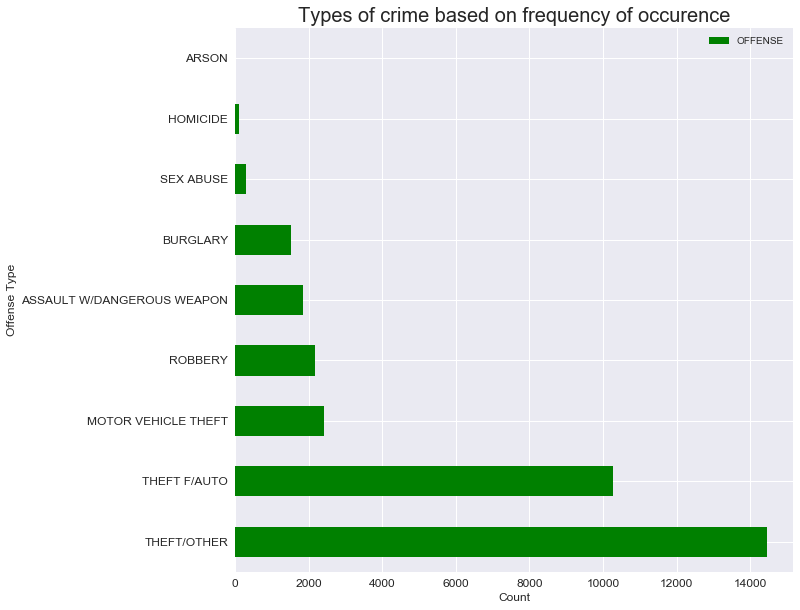

In [9]:
#Generates bar graph
ax = counts.plot(kind='barh', figsize=(10, 10), legend=True, fontsize=12, color='green')

#X axis text and display style of categories
ax.set_xlabel("Count", fontsize=12)
#plt.xticks(rotation=45)

#Y axis text
ax.set_ylabel("Offense Type", fontsize=12)

#Title
ax.set_title("Types of crime based on frequency of occurence", fontsize=20)

### Pie chart for day/night crime

In [10]:
#Getting unique values for shift
types = list(crime['SHIFT'].unique())
print(types)

['DAY', 'EVENING', 'MIDNIGHT']


In [11]:
#Frequency calculation of each shift type
sizes = crime['SHIFT'].value_counts()
print(sizes)

EVENING     13994
DAY         12183
MIDNIGHT     6891
Name: SHIFT, dtype: int64


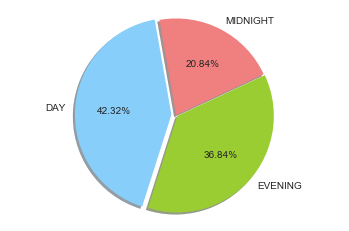

In [12]:
# Data to plot
labels = types
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.05, 0.015, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=100)
 
plt.axis('equal')
plt.show()

### Pie chart for weekday (Mon-Thurs), weekend (Fri-Sun)

In [32]:
import datetime
import pandas as pd

In [29]:
def format_date(date):
    '''Return date in M-D-Y -- H:M:S format'''
    epoch_time = str(date)[0: 10]
    return datetime.datetime.fromtimestamp(float(epoch_time)).strftime('%Y-%m-%d')

In [33]:
crime['date'] = crime['REPORT_DAT'].apply(format_date)
crime['date'] = pd.to_datetime(crime['date']).dt.date
crime['date'].head()

0    2017-12-15
1    2017-12-15
2    2017-12-15
3    2017-12-15
4    2017-12-15
Name: date, dtype: object

In [36]:
crime['day_of_week'] = crime['date'].apply(lambda x: x.weekday()) 

In [37]:
crime['day_of_week'].head()

0    4
1    4
2    4
3    4
4    4
Name: day_of_week, dtype: int64

In [40]:
def week_day(num):
    '''Return Weekday/Weekend'''
    if num < 4:
        return 'Weekday'
    if num >= 4:
        return 'Weekend'

In [41]:
crime['day'] = crime['day_of_week'].apply(week_day)

In [42]:
#Getting unique values for day
types = list(crime['day'].unique())
print(types)

['Weekend', 'Weekday']


In [43]:
#Frequency calculation of each day type
sizes = crime['day'].value_counts()
print(sizes)

Weekday    19172
Weekend    13896
Name: day, dtype: int64


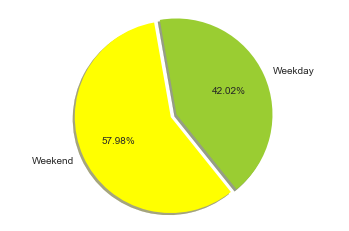

In [46]:
# Data to plot
labels = types
colors = ['yellow', 'yellowgreen']
explode = (0.05, 0.015)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=100)
 
plt.axis('equal')
plt.show()

### Histogram for crime frequency based on months

In [54]:
def month(date):
    '''Return month number'''
    return str(date)[5:7]

In [55]:
crime['month'] = crime['date'].apply(month)
crime['month'].head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: object

Text(0,0.5,'Frequency')

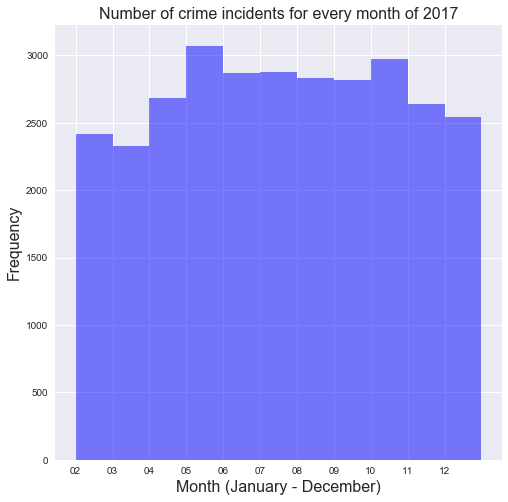

In [58]:
plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(crime['month'], bins=[1,2,3,4,5,6,7,8,9,10,11,12], facecolor='blue', alpha=0.5)

plt.title("Number of crime incidents for every month of 2017", fontsize=16)
plt.xlabel("Month (January - December)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

#### Actual plot should allow hovering with count as tooltip text